<center>
In God We Trust
</center>

# CE417: Artificial Intelligence

Dr. Mahdiyeh Soleymani Baghshah

Computer Engineering Department,
Sharif University of Technology,
Tehran, Tehran, Iran


## Markov Decision Process (30 Points)

HW3 :: Practical Question 2

<br>

Corresponding TA: Aryan Ahadinia, Saeed Hedayatiyan


In this question, We're going to implement a generic MDP solver, so we can solve every question by passing transition and reward functions. We use an example to test our implementation but it's important to write MDP solver functions in a generic form. So it's important to maintain notebook structure and only write codes and comment in annotated areas.

### Modeling a Problem (5 Points)

In a TV quiz show, there are several levels. At each level, if the participant answers the question correctly, they will receive some prize. If the participant's answer is wrong, they leave the competition empty-handed. Before each stage begins, the participant can decide whether to continue or withdraw and leave the game with the reward which they already earned.

Beside states representing each level, There are three terminal states of Win, Lost and Quit in the game. Actions in each state are quit and play. The player will go to the quit state with probability of 1 if they decide to take action quit. otherwise they will pass the level i by probability of win_ratio[i] and go to the state which represents the next level.

So the play / quit decision problem can be modeled as an MDP as below.

<p align="center">
<image src="./assets/quiz_problem.png">
</p>

Considering $100, $200, $300, $400 and $500 as rewards and 0.9, 0.7, 0.6, 0.3, 0.1 as win ratio for levels 0 to 4 respectively.

Complete two cells below to model the problem as an MDP. Write levels and actions as an str.


In [1]:
quiz_levels = [
    "0", "1", "2", "3", "4"
    ####### Complete this list (0.25 Point) #######
]
quiz_terminals = [
    "lost", "win", "quit"
    ####### Complete this list (0.25 Point) #######
]

quiz_states = quiz_levels + quiz_terminals
quiz_actions = [
    "play", "quit"
    ####### Complete this list (0.5 Point) #######
]


In [2]:
from typing import Callable
from typing import List
from typing import Tuple
from typing import Union


In [10]:
def quiz_transition(state: str, action: str, next_state: str) -> float:
    if state == "0":
        if next_state == "1" and action == "play":
            return 0.9
        elif next_state == "lost" and action == "play":
            return 1.0 - 0.9    
        elif next_state == "quit" and action == "quit":
            return 1.0
        else:
            return 0.0    

    elif state == "1":
        if next_state == "2" and action == "play":
            return 0.7
        elif next_state == "lost" and action == "play":
            return 1.0 - 0.7 
        elif next_state == "quit" and action == "quit":
            return 1.0
        else:
            return 0.0
    elif state == "2":
        if next_state == "3" and action == "play":
            return 0.6
        elif next_state == "lost" and action == "play":
            return 1.0 - 0.6 
        elif next_state == "quit" and action == "quit":
            return 1.0
        else:
            return 0.0

    elif state == "3":
        if next_state == "4" and action == "play":
            return 0.3
        elif next_state == "lost" and action == "play":
            return 1.0 - 0.3
        elif next_state == "quit" and action == "quit":
            return 1.0
        else:
            return 0.0

    elif state == "4":
        if next_state == "win" and action == "play":
            return 0.1
        elif next_state == "lost" and action == "play":
            return 1.0 - 0.1
        elif next_state == "quit" and action == "quit":
            return 1.0
        else:
            return 0.0

    elif state == "win":
        if next_state == "win":
            return 1.0
        return 0.0

    elif state == "lost":
        if next_state == "lost":
            return 1.0
        return 0.0

    elif state == "quit":
        if next_state == "quit":
            return 1.0
        return 0.0

    else:
        print("Invalid Start State!")
        return 0.0


def quiz_reward(state: str, action: str, next_state: str) -> Union[float, int]:
    if state == "0":
        if next_state == "1":
            return 0.0
        elif next_state == "lost":
            return 0.0
        elif next_state == "quit":
            return 0.0
        else:
            return 0.0
    elif state == "1"        :
        if next_state == "2":
            return 0.0
        elif next_state == "lost":
            return -100.0
        elif next_state == "quit":
            return 100.0
        else:
            return 0.0
    elif state == "2":
        if next_state == "3":
            return 0.0
        elif next_state == "lost":
            return -300.0
        elif next_state == "quit":
            return 300.0
        else:
            return 0.0
    elif state == "3":
        if next_state == "4":
            return 0.0
        elif next_state == "lost":
            return -600.0
        elif next_state == "quit":
            return 600.0
        else:
            return 0.0
    elif state == "4":
        if next_state == "win":
            return 1500.0
        elif next_state == "lost":
            return -1000.0
        elif next_state == "quit":
            return 1000.0
        else:
            return 0.0
    else:
        print("Invalid start state!")    
        return 0.0
    ###########################################
    ########## Code Here! (2 Points) ##########
    ###########################################


### Value Iteration (10 Points)

Now we want to implement a function which does the value iteration process. Consider that this function must be a generic function to all MDP problems. So any internal reference to global variables is forbidden.

This function gets transition function, reward function, discounting factor (gamma), list of states, list of terminal states, list of all possible actions and current value of each state as input and must return two lists: (1) updated values of each state and (2) list of best action which can be taken in each state regarding current values.


In [11]:
def mdp_iterate(
    transition_function: Callable[[str, str, str], float],
    reward_function: Callable[[str, str, str], float],
    gamma: float,
    states: List[str],
    terminals: List[str],
    actions: List[str],
    current_values: List[Union[float, int]],
) -> Tuple[List[Union[float, int]]]:
    new_values = []
    best_actions = []
    # print(current_values)
    # print(states)
    for i in range(len(states)):
        current_state = states[i]
        max_value = -float("inf")
        max_action = ""
        if current_state not in terminals:
            for action in actions:
                new_value = 0
                for j in range(len(states)):
                    next_state = states[j]
                    probablity = transition_function(current_state, action, next_state)
                    reward = reward_function(current_state, action, next_state)
                    if probablity > 0: # or equal?
                        new_value += probablity * (reward + (gamma * current_values[j]))
                if new_value > max_value:
                    max_value = new_value
                    max_action = action
            new_values.append(max_value)
            best_actions.append(max_action)
        else:
            new_values.append(0)
            best_actions.append("")

    ###########################################
    ########## Code Here! (10 Points) #########
    ###########################################
    return new_values, best_actions


In [13]:
# My Test
mdp_iterate(quiz_transition, quiz_reward, 0.01, quiz_states, quiz_terminals, quiz_actions, [0, 0, 0, 0, 0, 0, 0, 0])

([0.0, 100.0, 300.0, 600.0, 1000.0, 0, 0, 0],
 ['play', 'quit', 'quit', 'quit', 'quit', '', '', ''])

### MDP Solving (5 Points)

Now write a function to use the iterative approach to calculate values of each state and solve the MDP problem.

This function gets transition function, reward function, discounting factor (gamma), list of states, list of terminal states, list of all possible actions and number of iterations as input and must return a dictionary which maps states to best action can be taken. For example:

```Python
{
    'S1': 'A1',
    'S2': 'A2',
    ...
}
```


In [14]:
from typing import Dict


def mdp_solve(
    transition_function: Callable[[str, str, str], float],
    reward_function: Callable[[str, str, str], float],
    gamma: float,
    states: List[str],
    terminals: List[str],
    actions: List[str],
    iter: int,
) -> Dict['str', 'str']:
    current_values = [0 for i in range(len(states))]
    best_actions = ["" for i in range(len(states))]
    for i in range(iter):
        answer = mdp_iterate(transition_function, reward_function, gamma, states, terminals, actions, current_values)
        current_values = answer[0]
        best_actions = answer[1]

    return_dictionary = {}
    for j in range(len(current_values)):
        return_dictionary[states[j]] = best_actions[j]

    return return_dictionary


By now, running this code must solve the problem described above.


In [15]:
mdp_solve(
    quiz_transition,
    quiz_reward,
    0.5,
    quiz_states,
    quiz_terminals,
    quiz_actions,
    1000,
)


{'0': 'play',
 '1': 'quit',
 '2': 'quit',
 '3': 'quit',
 '4': 'quit',
 'lost': '',
 'win': '',
 'quit': ''}

### Analyzing effect of discounting factor (10 Points)

Now, solve the problem for different values of discounting factor. Then draw a plot to show how increasing discounting factor effect on best decision that should be take. Then write a paragraph about the result.

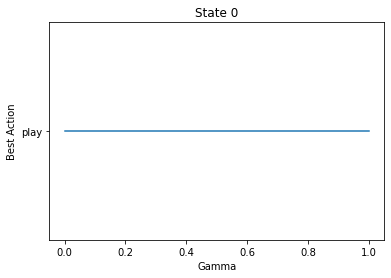

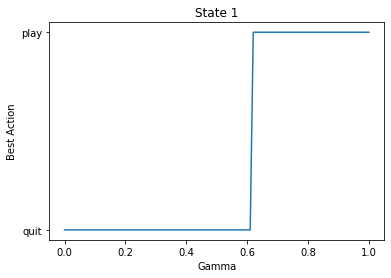

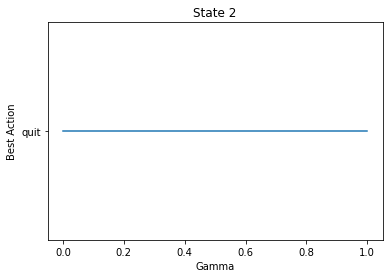

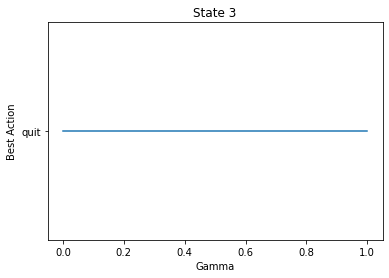

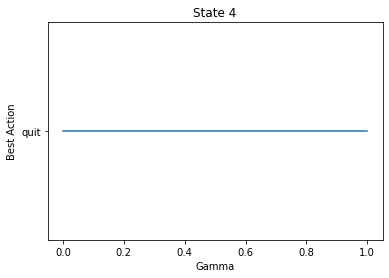

In [39]:
import numpy as np
import matplotlib.pyplot as plt

xpoints = [[0.0 for i in range(101)] for j in range(5)]
ypoints = [[0.0 for i in range(101)] for j in range(5)]
for i in range(101):
    gamma = float(i / 100)
    answer = mdp_solve(
        quiz_transition,
        quiz_reward,
        gamma,
        quiz_states,
        quiz_terminals,
        quiz_actions,
        1000,
    )
    xpoints[0][i] = gamma
    ypoints[0][i] = answer["0"]
    xpoints[1][i] = gamma
    ypoints[1][i] = answer["1"]
    xpoints[2][i] = gamma
    ypoints[2][i] = answer["2"]
    xpoints[3][i] = gamma
    ypoints[3][i] = answer["3"]
    xpoints[4][i] = gamma
    ypoints[4][i] = answer["4"]

plt.title("State 0")
plt.plot(np.array(xpoints[0]), np.array(ypoints[0]))
plt.xlabel('Gamma')
plt.ylabel('Best Action')
plt.show()

plt.title("State 1")
plt.plot(np.array(xpoints[1]), np.array(ypoints[1]))
plt.xlabel('Gamma')
plt.ylabel('Best Action')
plt.show()

plt.title("State 2")
plt.plot(np.array(xpoints[2]), np.array(ypoints[2]))
plt.xlabel('Gamma')
plt.ylabel('Best Action')
plt.show()

plt.title("State 3")
plt.plot(np.array(xpoints[3]), np.array(ypoints[3]))
plt.xlabel('Gamma')
plt.ylabel('Best Action')
plt.show()

plt.title("State 4")
plt.plot(np.array(xpoints[4]), np.array(ypoints[4]))
plt.xlabel('Gamma')
plt.ylabel('Best Action')
plt.show()

######### Write Here (5 Points) ###########

مطابق با نمودارهای بالا، هرچه گاما زیادتر شود، دوربین تر میشویم و هر چه گاما کوچکتر باشد نزدیکبین تریم.

یعنی وقتی گاما زیاد شود، به جوایزی که در ادامه می آید نیز خوشبین میشویم.

یعنی جوایز آینده نیز برایمان ارزشمند میشود

اما وقتی گاما کوچک است جوایز آینده بی ارزش است و همین جوایز دم دستی برایمان ارزشمند است

برای همین در استیت 2 از حدود گامای 0.6 به بعد، بازی کردن ارزشمند است
